In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [7]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<Axes: xlabel='Age', ylabel='count'>

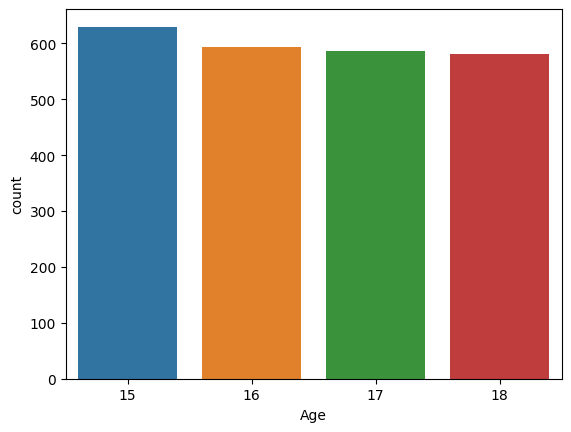

In [8]:
sns.countplot(data=df,x='Age')

<Axes: xlabel='Ethnicity', ylabel='count'>

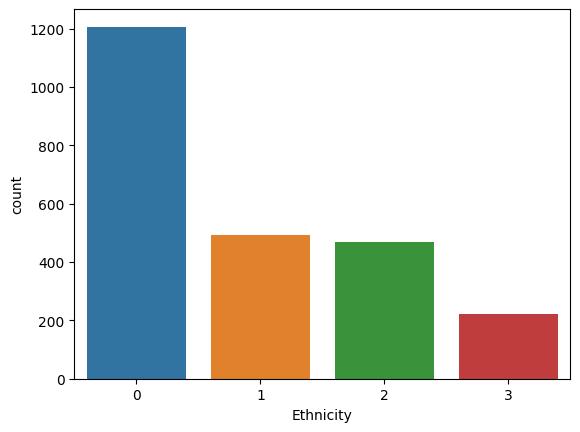

In [9]:
sns.countplot(data=df,x='Ethnicity')


<Axes: xlabel='ParentalEducation', ylabel='count'>

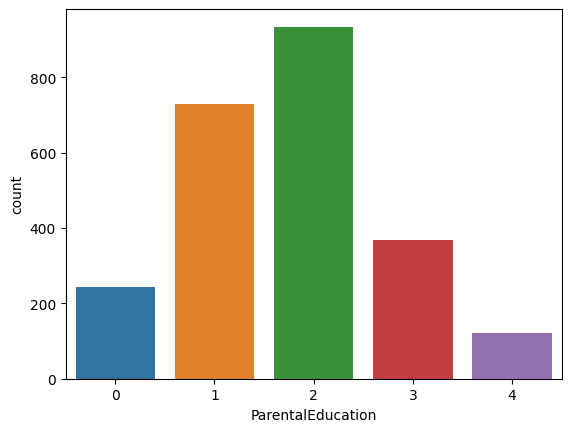

In [10]:
sns.countplot(data=df,x='ParentalEducation')


<Axes: xlabel='Gender', ylabel='count'>

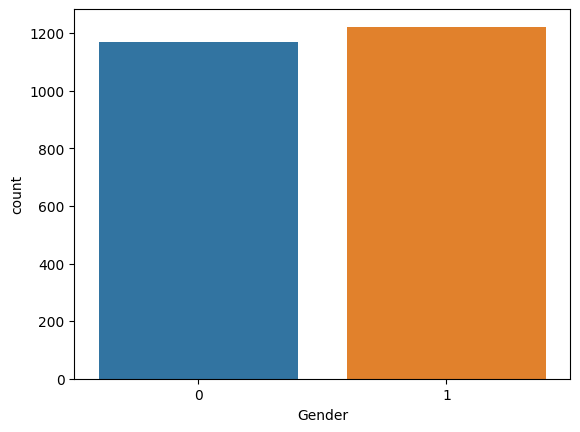

In [11]:
sns.countplot(data=df,x='Gender')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GPA', ylabel='Count'>

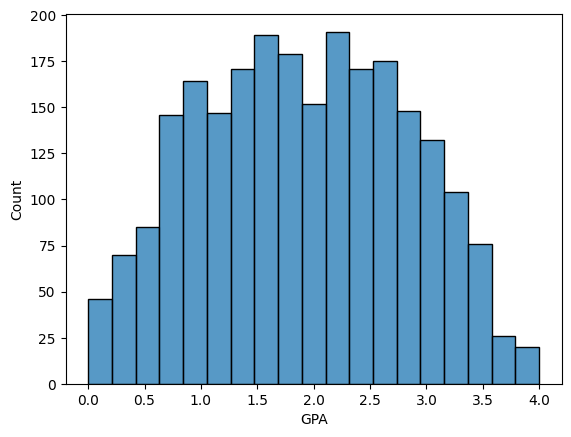

In [12]:
sns.histplot(data=df,x='GPA')

<Axes: xlabel='GradeClass', ylabel='count'>

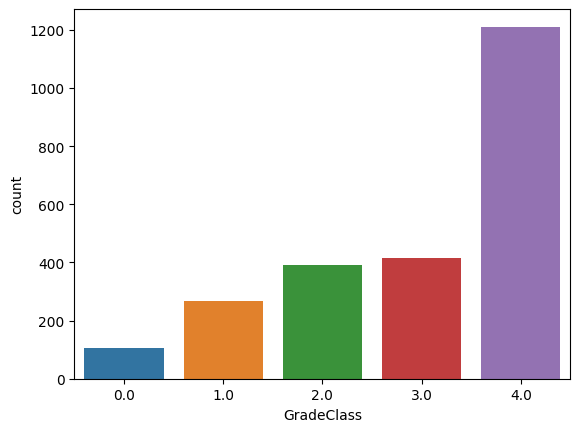

In [13]:
sns.countplot(data=df,x='GradeClass')

In [14]:
print("Size of dataset:", df.shape)
df.drop_duplicates(inplace=True)
print("Size of dataset:", df.shape)


Size of dataset: (2392, 15)
Size of dataset: (2392, 15)


In [15]:
X = df.drop(labels=['StudentID','GradeClass'],axis=1)
Y=df['GradeClass']

In [16]:
print ('X',X.head())
print ('Y', Y.head())

X    Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2        19.833723         7   
1   18       0          0                  1        15.408756         0   
2   15       0          2                  3         4.210570        26   
3   17       1          0                  3        10.028829        14   
4   17       1          0                  2         4.672495        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

        GPA  
0  2.929196  
1  3.042915  
2  0.112602  
3  2.054218  
4  1.288

In [17]:
X_Train,X_test, Y_Train, Y_test = train_test_split(X, Y,train_size=0.8,stratify=Y,random_state=1)
X_Train,X_val, Y_Train, Y_val = train_test_split(X_Train, Y_Train,train_size=0.8,stratify=Y_Train,random_state=1)

print("Size of Training dataset:", X_Train.shape, Y_Train.shape)
print("Size of Validation dataset:", X_val.shape, Y_val.shape)
print("Size of Test dataset:", X_test.shape, Y_test.shape)

Size of Training dataset: (1530, 13) (1530,)
Size of Validation dataset: (383, 13) (383,)
Size of Test dataset: (479, 13) (479,)


In [29]:
model = DecisionTreeClassifier(criterion="gini",ccp_alpha=0.2)
model.fit(X_Train,Y_Train)
y_val_predict = model.predict(X_val)

print("Accuracy Score:", f1_score(Y_val, y_val_predict,average='samples'))

ValueError: Samplewise metrics are not available outside of multilabel classification.